In [70]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [71]:
mnist = tf.keras.datasets.mnist

In [72]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [73]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [74]:
model = tf.keras.models.Sequential()

In [75]:
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

In [76]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [77]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 14s 6ms/step - loss: 0.2637 - accuracy: 0.9223
Epoch 2/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1066 - accuracy: 0.9675
Epoch 3/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0722 - accuracy: 0.9773


In [78]:
loss, accuracy = model.evaluate(x_test, y_test)
print(loss)
print(accuracy)
model.save("digits.model", save_format="h5")


313/313 [==============================] - 1s 3ms/step - loss: 0.0992 - accuracy: 0.9697
0.09921655803918839
0.9696999788284302


1/1 [==============================] - 0s 54ms/step
This number is: 5


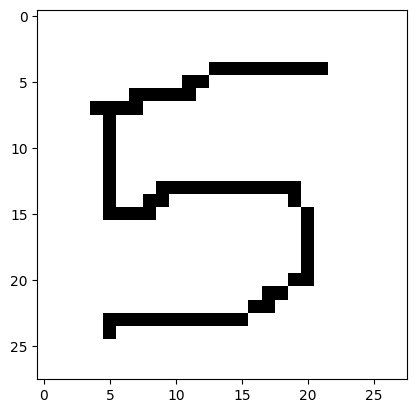

1/1 [==============================] - 0s 79ms/step
This number is: 5


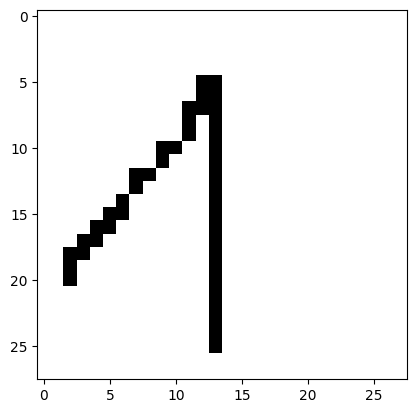

1/1 [==============================] - 0s 70ms/step
This number is: 2


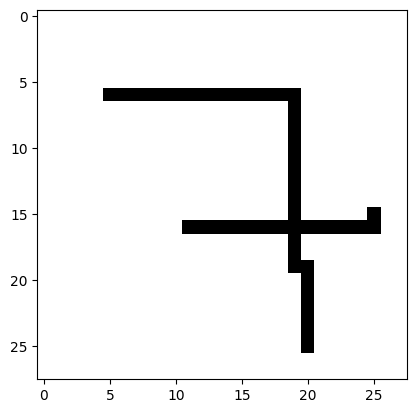

1/1 [==============================] - 0s 52ms/step
This number is: 3


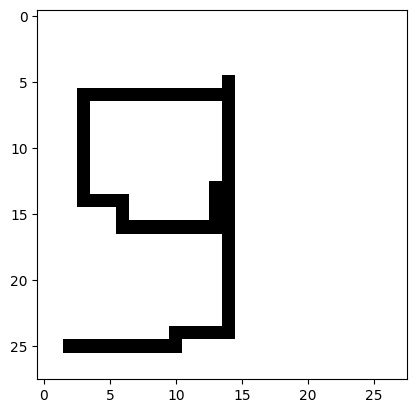

1/1 [==============================] - 0s 63ms/step
This number is: 3


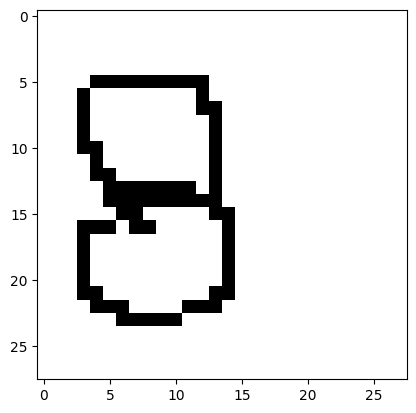

In [84]:
tf.keras.models.load_model("digits.model")
for x in range(1,6):
    img = cv.imread(f"{x}.png")[:,:,0]
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    print(f"This number is: {np.argmax(prediction)}")
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show()
